# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [14]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [16]:
# Visit the website
url='https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [17]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

table = soup.find('table', class_='table')



In [18]:
mars_facts = {}

# Extract all rows of data
rows = table.find_all('tr')

print(rows)


[<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>, <tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740

In [19]:
for row in rows:
    row_heading = row.find_all('th')
    row_data = row.find('td')
    mars_facts[row_heading] = row_heading
    mars_facts[row_data]=row_data
    print(mars_facts)

TypeError: unhashable type: 'ResultSet'

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [ ]:
# Create an empty list

# Loop through the scraped data to create a list of rows


In [20]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
import pandas as pd
df=pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')

# Confirm DataFrame was created successfully

mars_df=df[0]




mars_df.max

In [21]:
mars_df=df[0]
print(mars_df)

        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [22]:
# Examine data type of each column
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [23]:
# Change data types for data analysis

mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

In [24]:
# Confirm type changes were successful by examining data types again
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [25]:
# 1. How many months are there on Mars?
maxValue = mars_df['month'].max(skipna=False)
 
print(maxValue)

#12 months

12


In [26]:
# 2. How many Martian days' worth of data are there?
count=mars_df.count()
print(count)

#1867 days

id                  1867
terrestrial_date    1867
sol                 1867
ls                  1867
month               1867
min_temp            1867
pressure            1867
dtype: int64


In [27]:
# 3. What is the average low temperature by month?

avg = mars_df.groupby('month')
mean= avg.describe()

mean

-76.12105

-76.12105

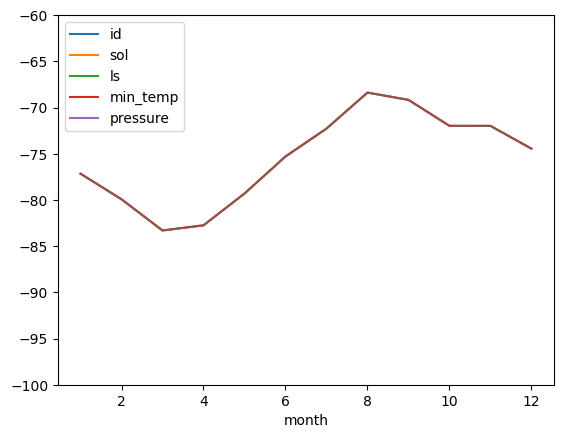

In [30]:
#Plot the average temperature by month

import numpy as np
mean_month=mars_df.groupby('month').mean()
mean_month_temp=mean_month['min_temp']
mean_month.plot()
month=np.arange(1,13)

mean_month_temp.plot()
mean_month_temp


plt.ylim(-100, -60)
plt.show()

In [32]:
# Identify the coldest and hottest months in Curiosity's location
max=mars_df.groupby('month').max()
print(max)
#month 1 is max
mean=mars_df.groupby('month').mean
print(mean)

         id terrestrial_date   sol   ls  min_temp  pressure
month                                                      
1      1668       2017-07-07  1748   29     -62.0     888.0
2      1732       2017-09-12  1814   59     -76.0     908.0
3      1798       2017-11-19  1880   89     -77.0     907.0
4      1863       2018-01-25  1945  119     -77.0     857.0
5      1895       2018-02-27  1977  149     -74.0     777.0
6      1317       2016-07-02  1388  179     -71.0     764.0
7      1360       2016-08-24  1440  209     -65.0     836.0
8      1407       2016-10-11  1487  239     -63.0     914.0
9      1453       2016-11-28  1533  269     -63.0     925.0
10     1501       2017-01-16  1581  299     -66.0     917.0
11     1551       2017-03-08  1631  329     -67.0     879.0
12     1608       2017-05-05  1687  359     -70.0     853.0
<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fc6903fe280>>


In [36]:
# 4. Average pressure by Martian month
avg_pressure=mars_df.groupby('month')
avg_pressure_month=avg_pressure.mean()
print(avg_pressure_month)

                id          sol          ls   min_temp    pressure
month                                                             
1      1013.873563  1077.574713   15.281609 -77.160920  862.488506
2      1109.882022  1175.853933   44.258427 -79.932584  889.455056
3      1132.697917  1204.406250   75.010417 -83.307292  877.322917
4      1175.164948  1244.500000  104.365979 -82.747423  806.329897
5      1115.033557  1182.691275  132.885906 -79.308725  748.557047
6       735.306122   750.829932  164.897959 -75.299320  745.054422
7       714.549296   715.105634  194.894366 -72.281690  795.105634
8       718.078014   795.333333  224.347518 -68.382979  873.829787
9       785.843284   861.186567  254.052239 -69.171642  913.305970
10      955.723214  1034.669643  286.330357 -71.982143  887.312500
11      874.246377   947.224638  314.536232 -71.985507  857.014493
12      931.602410   990.951807  344.692771 -74.451807  842.156627


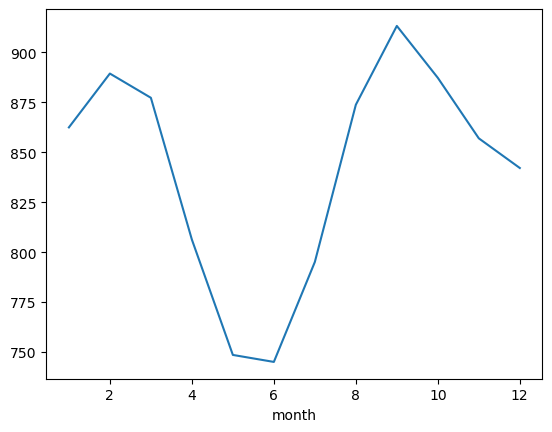

In [39]:
# Plot the average pressure by month
avg_pressure_month['pressure'].plot()
plt.show()

In [47]:
# 5. How many terrestrial (earth) days are there in a Martian year?


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [48]:
# Write the data to a CSV
mars_df.to_csv("data.csv", sep='\t', encoding='utf-8')

In [49]:
browser.quit()